# Visualize Max & Min Ratio Transitions

In [1]:
import os
import tensorflow as tf
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('/home/dopamine')
from dopamine.replay_memory import cs_replay_buffer
from dopamine.replay_memory.circular_replay_buffer import ReplayElement
from dopamine.discrete_domains import checkpointer

In [3]:
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES']='5'
sess = tf.InteractiveSession()

In [9]:
def load_replay_buffer(log_directory=None, game=None, extra_dir=None):
    buffer = cs_replay_buffer.WrappedCSReplayBuffer(
                observation_shape=(84,84),
                stack_size=4,
                replay_capacity=10000000,
                extra_storage_types=[ReplayElement('beginning', (), np.bool)])
    
    checkpoint_file_prefix = 'ckpt'
    if log_directory:
        checkpoint_dir = os.path.join(log_directory, 'checkpoints')
    else:
        log_directory = os.path.join('./logs', game + extra_dir)
        checkpoint_dir = os.path.join(log_directory, 'checkpoints')
    #my_checkpointer = checkpointer.Checkpointer(checkpoint_dir, checkpoint_file_prefix)
    latest_checkpoint_version = checkpointer.get_latest_checkpoint_number(checkpoint_dir)
    
    buffer.load(checkpoint_dir, latest_checkpoint_version)
    
    return buffer

In [45]:
def get_transitions_by_indices(indices):
    batch_size=len(indices)
    transition_batch = buffer.memory.sample_transition_batch(batch_size=batch_size, indices=indices)
    transition_type = buffer.memory.get_transition_elements()
    
    transitions = []
    for i, index in enumerate(indices):
        transition = collections.OrderedDict()
        transition['index'] = index
        for element, element_type in zip(transition_batch, transition_type):
            transition[element_type.name] = element[i]
        transitions.append(transition)

    return transitions

def sort_transitions_by_ratio(transitions, reverse=True):
    transitions.sort(key= lambda x: x['sampling_probabilities'], reverse=reverse)
    
def keep_K_max_ratio_transitions(transitions):
    sort_transitions_by_ratio(transitions)
    return transitions[:min(K,len(transitions))]

def keep_K_min_ratio_transitions(transitions):
    sort_transitions_by_ratio(transitions, reverse=False)
    transitions = [transition for transition in transitions if transition['sampling_probabilities']>0.0]
    return transitions[:min(K,len(transitions))]

def get_max_and_min_transitions(min_idx, max_idx, batch_size):
    max_transitions = list()
    min_transitions = list()

    idx = min_idx
    while idx < max_index:
        indices = [i for i in range(idx, min(batch_size + idx, max_idx))]
        idx = idx + batch_size
        if idx%100000==0:
            print(idx)

        transitions = get_transitions_by_indices(indices)

        max_transitions = keep_K_max_ratio_transitions(max_transitions + transitions)

        min_transitions = keep_K_min_ratio_transitions(min_transitions + transitions)
        
    return max_transitions, min_transitions

def plot_transitions(transitions, columns=4, rows=4):
    fig = plt.figure(figsize=(14, 14))
    # ax enables access to manipulate each of subplots
    ax = []

    for i in range(columns*rows):
        img = transitions[i]['state'][:,:,3]
        # create subplot and append to ax
        ax.append( fig.add_subplot(rows, columns, i+1) )
        ax[-1].set_title("c:"+str(transitions[i]['sampling_probabilities']))  # set title
        plt.axis('off')
        plt.imshow(img)
    
    plt.show()  # finally, render the plot
    plt.close()

In [46]:
K = 50
batch_size = 1000
min_index = 0
max_index = 10000000

## Breakout

In [11]:
game = 'Breakout'
extra_dir = '/logapproach/centeredRange/x2/discount97epsilon5weight002'

buffer = load_replay_buffer(game=game, extra_dir=extra_dir)

INFO:tensorflow:Creating a OutOfGraphPrioritizedReplayBuffer replay memory with the following parameters:
INFO:tensorflow:	 observation_shape: (84, 84)
INFO:tensorflow:	 observation_dtype: <class 'numpy.uint8'>
INFO:tensorflow:	 stack_size: 4
INFO:tensorflow:	 replay_capacity: 10000000
INFO:tensorflow:	 batch_size: 32
INFO:tensorflow:	 update_horizon: 1
INFO:tensorflow:	 gamma: 0.990000


In [48]:
max_transitions, min_transitions = get_max_and_min_transitions(min_index, max_index, batch_size)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000


### Breakout MAX ratio transitions

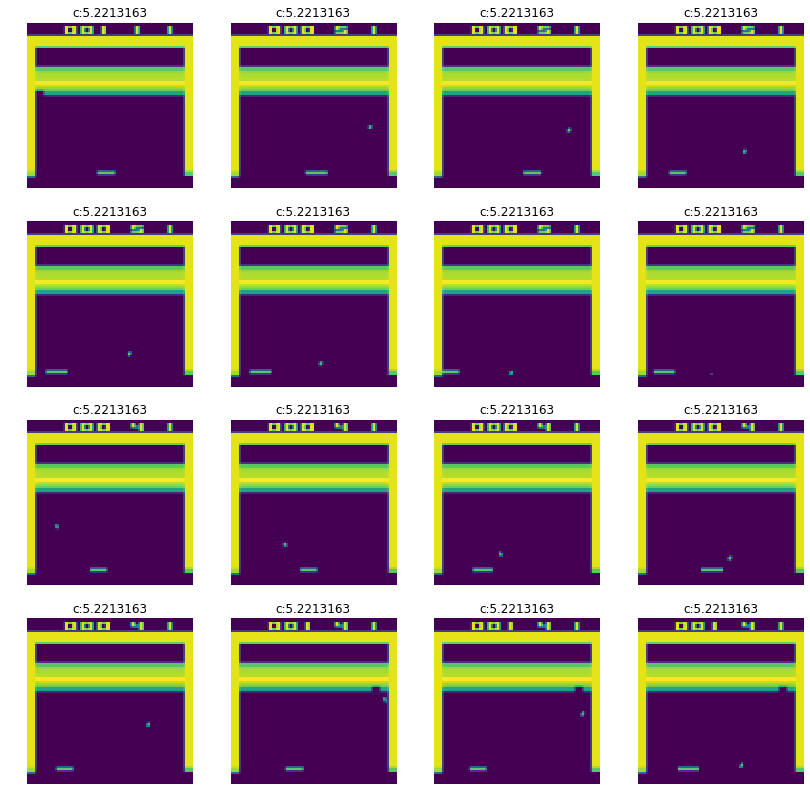

In [49]:
plot_transitions(max_transitions)

### Breakout MIN ratio transitions

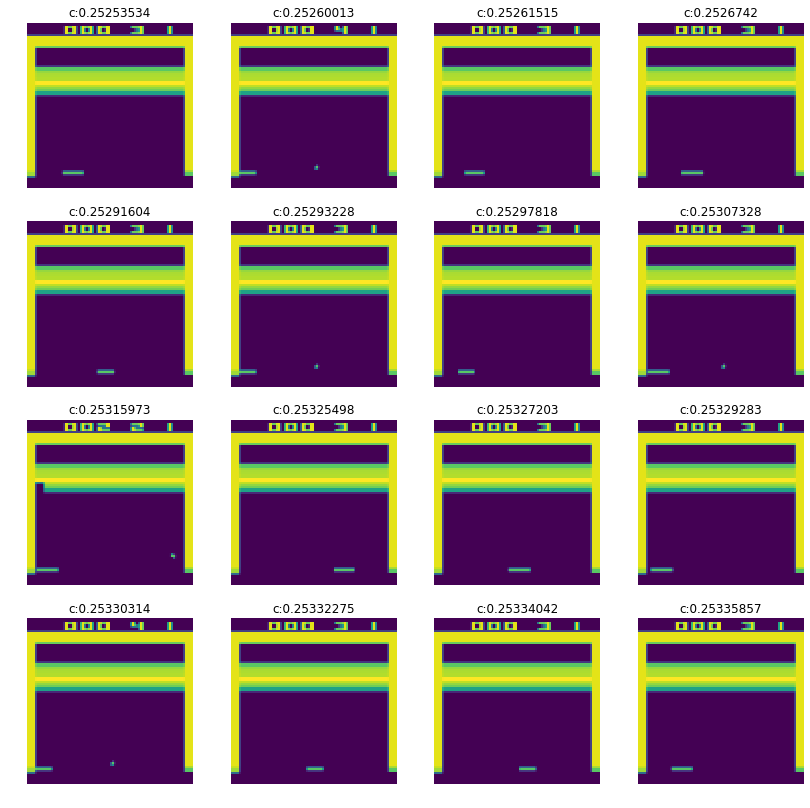

In [50]:
plot_transitions(min_transitions)